In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skimage.color import rgb2gray
from sklearn.preprocessing import normalize

In [2]:
def preprocess_image(image):
    blurred_image = cv2.medianBlur(image, ksize=5)
    blurred_image = cv2.resize(blurred_image, (64, 64))
    return blurred_image

In [3]:
def extract_hog_features(image):
    winSize = (64, 64)
    blockSize = (16, 16)
    blockStride = (8, 8)
    cellSize = (8, 8)
    nbins = 9
    hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins)
    h = hog.compute(image)
    return h.flatten()

In [4]:
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

In [7]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
def predict_and_visualize(image_path, X_train, y_train, distance_metric):

    lda = LDA()
    lda.fit(X_train, y_train)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    image = cv2.imread(image_path)
                
    if image is not None:
        faces = face_cascade.detectMultiScale(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 1.1, 4)
        for (x, y, w, h) in faces:
            face_img = image[y:y+h, x:x+w] 
            face_img = preprocess_image(face_img)
            hog_features = extract_hog_features(face_img)
        if len(faces) <1:
            face_img = preprocess_image(image)
            hog_features = extract_hog_features(face_img)
  


    X_train_lda = lda.transform(X_train)
    
    hog_features_lda = lda.transform(np.array([hog_features]))  

    # En yakın komşuyu bul
    min_distance = float('inf')
    predicted_label = None
    for train_feature, train_label in zip(X_train_lda, y_train):
        distance = distance_metric(hog_features_lda, train_feature)
        if distance < min_distance:
            min_distance = distance
            predicted_label = train_label
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resmi ve tahmini etiketi göster
    plt.imshow(image_rgb)
    plt.title(f"Predicted Label: {predicted_label}", fontsize=20, color='red')
    plt.axis('off')  # Eksenleri gizle
    plt.show()

In [5]:
import pickle

# Verileri dosyadan yükle
with open('train_test_data.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

Yanlış Sınıflandırılan Resimlere Örnekler


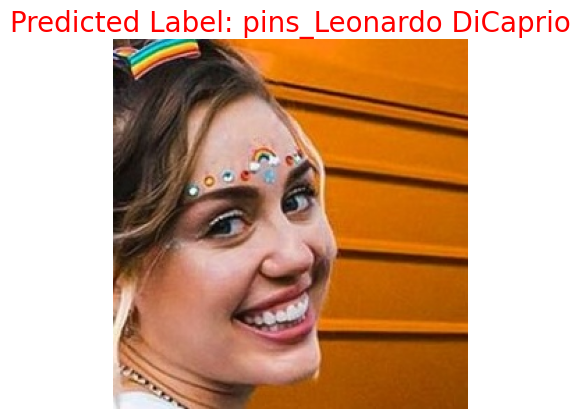

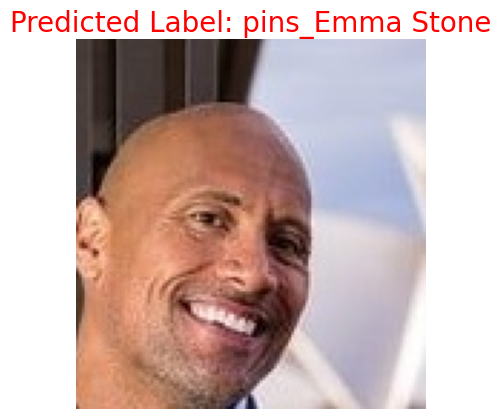

In [8]:
print("Yanlış Sınıflandırılan Resimlere Örnekler")
predict_and_visualize("105_classes_pins_dataset\pins_Miley Cyrus\Miley Cyrus0_3578.jpg", X_train, y_train,euclidean_distance) #BAD
predict_and_visualize("105_classes_pins_dataset\pins_Dwayne Johnson\Dwayne Johnson35_1663.jpg", X_train, y_train,euclidean_distance)

Doğru Sınıflandırılan Resimlere Örnekler


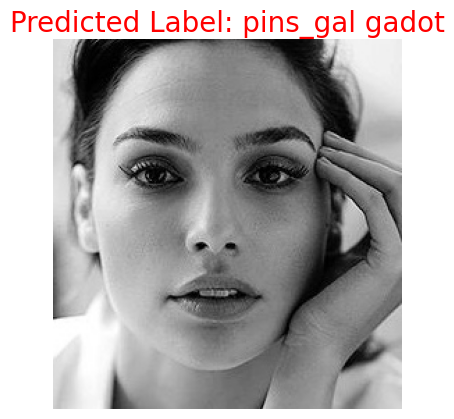

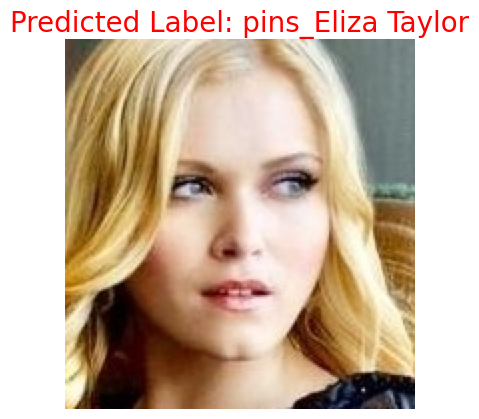

In [9]:
print("Doğru Sınıflandırılan Resimlere Örnekler")
predict_and_visualize("105_classes_pins_dataset\pins_gal gadot\gal gadot0_1658.jpg", X_train, y_train,euclidean_distance) #GOOD
predict_and_visualize("105_classes_pins_dataset\pins_Eliza Taylor\Eliza Taylor33_823.jpg", X_train, y_train,euclidean_distance)